In [1]:
import os
import sys
ROOT_DIR = os.path.dirname(os.getcwd())
sys.path.append(ROOT_DIR)
from player.scoring import WordleScorer as ws
import matplotlib.pyplot as plt

In [40]:
file_path = 'valid-wordle-words.txt'
scorer = ws.WordleScorer('delay')
words = scorer.readWordleFile(file_path)

In [80]:
# letter frequencies
letter_frequencies = scorer.getAllLetterFrequencies(words)
starting_letter_frequencies = scorer.getFirstLetterFrequencies(words)
second_letter_frequencies = scorer.getSecondLetterFrequencies(words)
third_letter_frequencies = scorer.getThirdLetterFrequencies(words)
fourth_letter_frequencies = scorer.getFourthLetterFrequencies(words)
last_letter_frequencies = scorer.getLastLetterFrequencies(words)

In [81]:
# plot Zipf's law
def plot_zipfs_law(letter_counts, title):

    # sort letters by frequency
    letters, frequencies = zip(*letter_counts.most_common())
    ranks = range(1, len(frequencies) + 1)

    # apply Zipf's law: f = c / r (where f is frequency, r is rank, c is frequency of most common letter)
    constant = frequencies[0]
    expected_frequencies = [constant / r for r in ranks]
    plt.figure(figsize=(10, 5))

    # plotting actual and expected frequencies (log-log plot)
    plt.loglog(ranks, frequencies, marker='o', linestyle='none', label='Actual Frequencies')
    plt.loglog(ranks, expected_frequencies, label='Expected by Zipf\'s Law', linestyle='--')
    plt.xlabel('Rank of letter (most common to least common)')
    plt.ylabel('Frequency of letter')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(ranks, letters)
    plt.show()

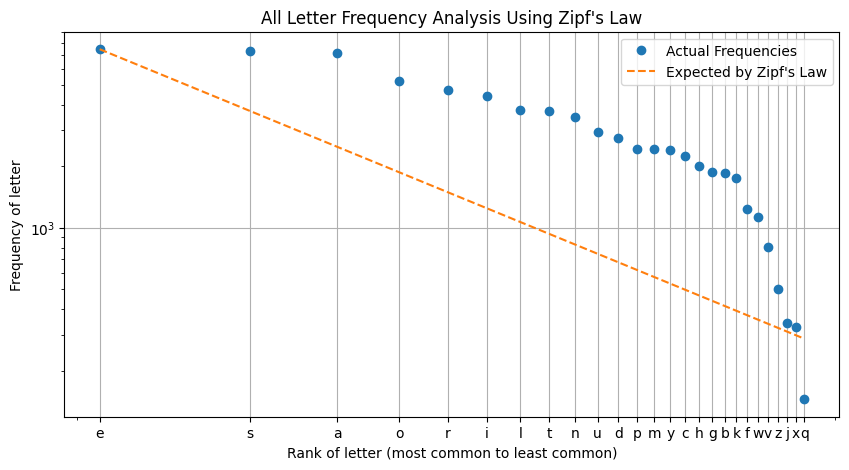

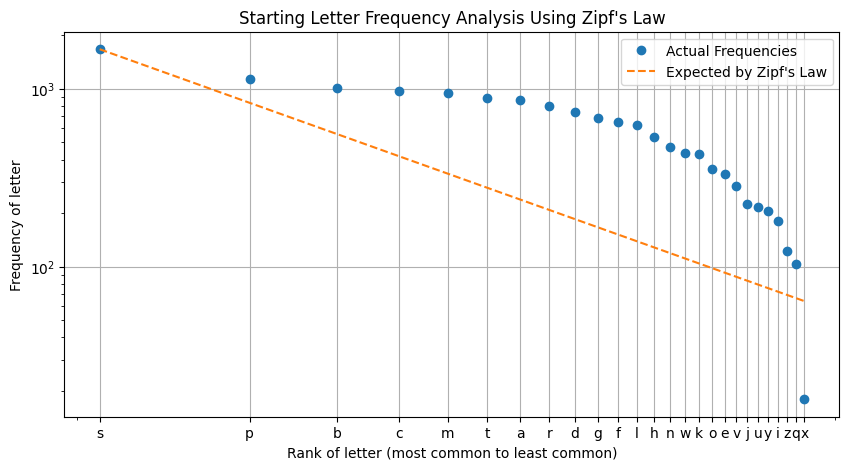

In [82]:
# analyze all letters
plot_zipfs_law(letter_frequencies, 'All Letter Frequency Analysis Using Zipf\'s Law')

# analyze starting letters
plot_zipfs_law(starting_letter_frequencies, 'Starting Letter Frequency Analysis Using Zipf\'s Law')